In [2]:
# https://github.com/sdv-dev/CTGAN

import os
import matplotlib.pyplot as plt

import pandas as pd

from CTGan.ctgan import CTGAN
print(os.getcwd())

d:\PhD2016_acer\01. Workspaces\fbEvasionMetrics\AdvFailureCurves


# Load Data

## <font color='red'> KYOTO </font>

In [3]:
strFileName =  r'../DATA/Kyoto2015DS.csv'
dfKyoto = pd.read_csv(strFileName, delimiter=',')

print(dfKyoto.shape)
print(dfKyoto.groupby('label').size())
#print(dfKyoto.head(5))

(60000, 14)
label
0    30000
1    30000
dtype: int64


### Select Negative Data

In [5]:
# Select rows where column 'column_name' equals a specific value
dfRealData = dfKyoto.loc[dfKyoto['label'] == 1]
dfRealData = dfRealData.drop('label', axis=1)
print(dfRealData.shape)

(30000, 13)


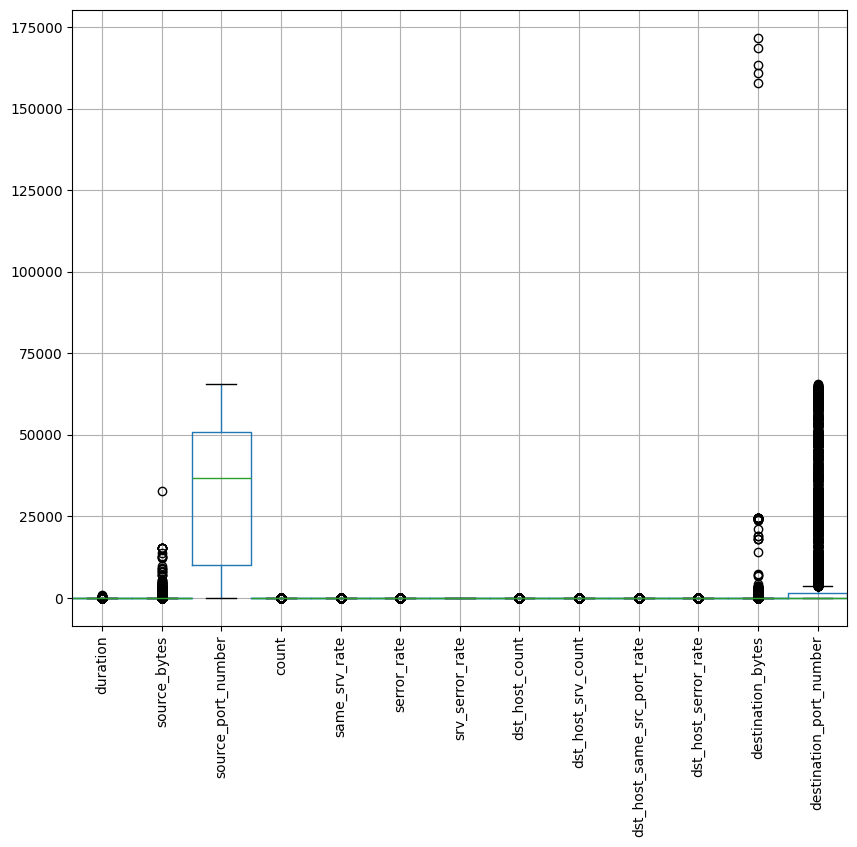

In [13]:
dfRealData.boxplot(figsize = (10, 8), widths = 1)
# Rotate x-axis labels
plt.xticks(rotation=90)
#plt.xlabel("X-axis Label", fontsize=14, fontweight='bold', fontfamily='Arial')
plt.show()

# <font color='blue'>Generate Synthetic Data</font>

In [7]:
ctgan = CTGAN(epochs=10)
ctgan.fit(dfRealData)

# Create synthetic data
dfSynData = ctgan.sample(100)
print(dfSynData.shape)
print(dfSynData.head(5))

(100, 13)
   duration  source_bytes  source_port_number  count  same_srv_rate  \
0  2.000623            -1               46483      0      -0.001187   
1 -0.098220           649               59615      0      -0.001645   
2  6.168253             1               28959      4       0.000821   
3  2.122153            41               -2362      0      -0.000758   
4  0.008799            -3               27780      0      -0.000595   

   serror_rate  srv_serror_rate  dst_host_count  dst_host_srv_count  \
0    -0.002968         0.004648               0                  10   
1    -0.002219         0.980495               0                   0   
2    -0.000676         0.783282              26                  -1   
3    -0.001029         0.856183               0                   0   
4    -0.001431         0.576408               0                  -1   

   dst_host_same_src_port_rate  dst_host_serror_rate  destination_bytes  \
0                     0.000971              0.002329         

# tSNE Plot

In [ ]:
dfReal_100 = dfRealData.sample(n=100, random_state=42)
dfReal_100['Label']
print(dfReal_100.shape)

(100, 13)


In [ ]:
dfCols = ['Bin_'+str(i) for i in range(dfReal_100.shape[1])]
dfCols.append('Labels')
#print(dfCols)
df = pd.DataFrame(listDS, columns=dfCols)